In [227]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [228]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor 
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, confusion_matrix 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.model_selection import train_test_split

In [229]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-4-heart.csv')
# data.head(1)
# data.info()

In [230]:
data.duplicated().sum()
data.drop_duplicates(keep='first', subset=None, inplace=True, ignore_index=False)
data.duplicated().sum()

0

<AxesSubplot:title={'center':'Cholesterol distribution'}, xlabel='chol', ylabel='Count'>

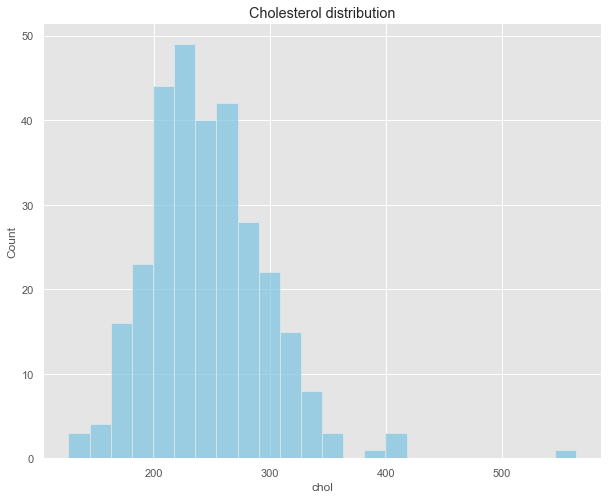

In [231]:
f,ax = plt.subplots(figsize=(10,8))
ax.set_title('Cholesterol distribution')
sns.histplot(data.chol, color='c', ax=ax)

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Cholesterol Boxplot'}, xlabel='chol'>

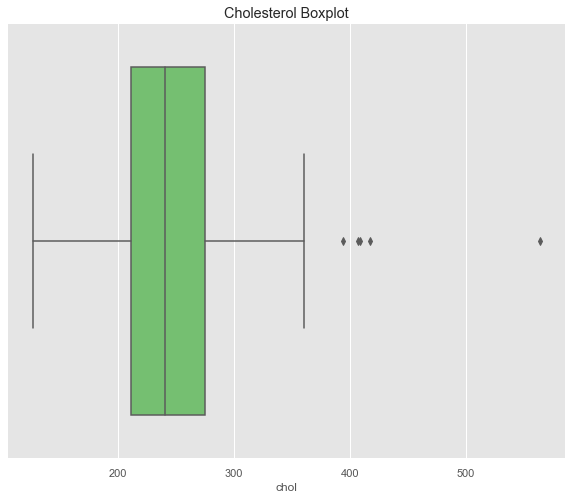

In [232]:
f,ax = plt.subplots(figsize=(10,8))
ax.set_title('Cholesterol Boxplot')
sns.boxplot(data.chol, color='g', ax=ax)

In [233]:
data.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64

<AxesSubplot:title={'center':'Correlation distribution'}>

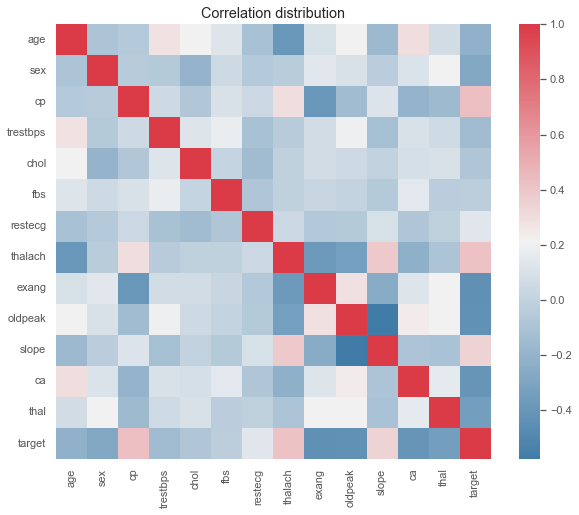

In [234]:
f,ax = plt.subplots(figsize=(10,8))
ax.set_title('Correlation distribution')

data_corr = data.corr()
sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_),cmap=sns.diverging_palette(240,10, as_cmap=True), square=True, ax=ax)

In [235]:
orig_sex_val = data.sex

In [236]:
cat_val = ['age','trestbps','chol','thalach','oldpeak']
num_val = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
x = data.drop(columns=['target'], axis=1)
y = data.target

In [237]:
coded_data = [('num', StandardScaler(), num_val), ('cat', OrdinalEncoder(),cat_val)]
transformed_data = ColumnTransformer(transformers=coded_data)
x = transformed_data.fit_transform(x)

In [239]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [249]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

pred_y_train = log_reg.predict(x_train)
pred_y_test = log_reg.predict(x_test)

acu_train_scr = accuracy_score(y_train, pred_y_train).round(3)
acu_test_scr = accuracy_score(y_test, pred_y_test).round(3)

acu_per_mod = pd.DataFrame([ 
    'LogisticRegression', acu_train_scr, acu_test_scr
]).transpose()
acu_per_mod.columns = ['Method', 'Accuracy Score Train', 'Accuracy Score Test']
acu_per_mod

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Method,Accuracy Score Train,Accuracy Score Test
0,LogisticRegression,0.863,0.846
